# Проект E-Commerce: Приняте решений в бизнесе. Анализ  A/B - теста.

**ОПИСАНИЕ ПРОЕКТА:**
Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Нам необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Для анализа были предоставлены следующие данные:**
* для приоритезации гипотез
    * *краткое описание гипотезы*
    * *охват пользователей по 10-балльной шкале*
    * *влияние на пользователей по 10-балльной шкале*
    * *уверенность в гипотезе по 10-балльной шкале*
    * *затраты ресурсов на проверку гипотезы по 10-балльной шкале*
* для анализа A/B-теста
    * *данные о заказах:*
         + *идентификатор заказа*
         + *идентификатор пользователя, совершившего заказ*
         + *дата, когда был совершён заказ*
         + *выручка заказа* 
         + *группа A/B-теста, в которую попал заказ*
    * *данные о визитах:*
         + *дата*
         + *группа A/B-теста*
         + *количество пользователей в указанную дату в указанной группе A/B-теста*

**Цели исследования:**
* Проверить корректность данных проведенного теста
* Проанализировать A/B-тест
* Принять решение по результатам A/B-теста

  **Ход исследования**:
  * Приоритезация гипотеза с помощью фреймворков ICE и RICE
  * Анализ A/B-теста:
    * изучение, проверка и предобработка данных
    * визуализация камулятивной выручки и среднего чека и их относительного изменения по группам
    * посчитать 95-й и 99-й процентвили количества и стоимости заказов
    * посчитать статистическую значимость различий в среднем колиечестве заказов и среднем чеке между группами по "сырым" данным
    * посчитать статистическую значимость различий в среднем колиечестве заказов и среднем чеке между группами по "очищенным" данным
  * Сформулировать выводы по результатам анализа

## Приоритезация гипотез

*В этой части проекта нам необходимо выбрать гипотезу, которую будем исследовать в первую очередь*

### Импортируем библиотеки и выгрузим данные:

In [1]:
import pandas as pd

In [2]:
try:
    data = pd.read_csv('Users/Download/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
data.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Проведем приоритезацию гипотез несколькими способами, чтобы выбрать одну максимально отвечающую интересам бизнеса на данный момент:

#### Применим фреймфорк ICE и отсортируем  получившийся результат по убыванию:

In [3]:
pd.set_option('display.max_colwidth', 0)
data['ICE'] = round((data['Impact'] * data['Confidence'])/data['Efforts'], 1)

data_ICE = data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
data_ICE

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


#### Применим  также фреймфорк RICE и отсортируем получившийся результат по убыванию:

In [4]:
data['RICE'] = round((data['Reach'] * data['Impact'] * data['Confidence'])/data['Efforts'],1)

data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).merge(data_ICE, on='Hypothesis')

,Hypothesis,RICE,ICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.2
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.3
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.0
4,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.1
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.3
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.0


#### Сравним результаты:

In [5]:
print('Приоритная гипотеза по ICE:', data.loc[8]['Hypothesis'])
print('Приоритная гипотеза по RICE:', data.loc[7]['Hypothesis'])

Приоритная гипотеза по ICE: Запустить акцию, дающую скидку на товар в день рождения
Приоритная гипотеза по RICE: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


### Вывод:

**Мы проверили значимость гипотез двумя способами и получили разные приоритеты. В первом случае мы не учитывали охват пользователей, поэтому самым сильным оказался вариант со скидкой на товар в день рождения. Во втором случае мы учли охват пользователей и приоритет изменился в сторону гипотез охватывающих, максимальное количество пользователей.**  

**По итогам приоритезации рекомендуется первой выбрать для A/B-теста гипотезу с индексом 7.**

## Анализ A/B - теста. 

### Мы получили результаты  A/B-теста,  загрузим библиотеки и выгрузим данные :

In [6]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings

In [7]:
try:
    orders = pd.read_csv('Users/Download/orders.csv')
    visitors = pd.read_csv('Users/Download/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [8]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


*У нас есть данные о заказах. Переименуем названия столбцов для удобства дальнейшей работы:*

In [9]:
orders.columns = ['order_id', 'user_id', 'date', 'revenue', 'group']

In [10]:
orders.head(5)

,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


*И данные о визитах.*

*Проверим данные на соответствие форматов, наличие пропусков и дубликатов*:

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  1197 non-null   int64 
 1   user_id   1197 non-null   int64 
 2   date      1197 non-null   object
 3   revenue   1197 non-null   int64 
 4   group     1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
orders.isna().sum()

order_id    0
user_id     0
date        0
revenue     0
group       0
dtype: int64

In [15]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [16]:
orders.duplicated().sum()

0

In [17]:
visitors.duplicated().sum()

0

*В результате проверки мы не выявили ни пропусков, ни дубликатов, но дата указана в виде текста, изменим формат даты в обеих таблицах:*

In [18]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [19]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

*Теперь данные готовы к анализу.*

### Анализ кумулятивных метрик.

#### Динамика кумулятивной выручки по группам.

*Создадим массив уникальных пар значений дат и групп теста:*

In [20]:
datesGroups = orders[['date', 'group']].drop_duplicates()

*Получим агрегированные кумулятивные по дням данные о заказах и посетителях:*

In [21]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': 'nunique',
            'user_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


In [22]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

*Объединим полученные данные в одну таблицу*

In [23]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [24]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


*Построим графики кумулятивной выручки по дням и группам A/B-тестирования:* 

In [25]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

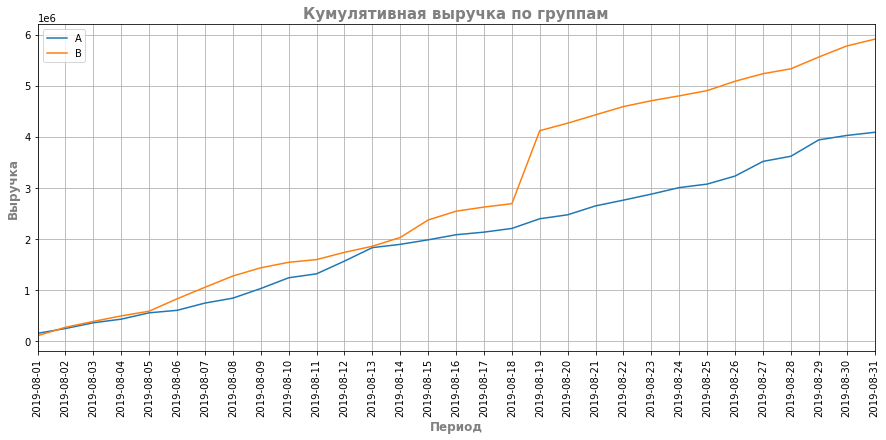

In [26]:
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title("Кумулятивная выручка по группам", fontweight='bold', color = 'grey', fontsize='15')
plt.xlabel('Период', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.ylabel('Выручка', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.grid(visible=True)
x_ticks = np.arange('2019-08-01', '2019-09-01', 1, dtype='datetime64[D]')
plt.xticks(x_ticks,rotation = 90)
plt.xlim(cumulativeData['date'].min(),cumulativeData['date'].max());

**Выручка равномерно увеличивается на протяжении всего периода. При этом есть резкие всплески и в группе А(13 августа) и в группе B(19 августа), что может говорить о наличии аномальных значений в данных. Также важно отметить тенденцию к росту выручки группы B относительно группы А.**

#### Динамика кумулятивного среднего чека по группам.

*Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:*

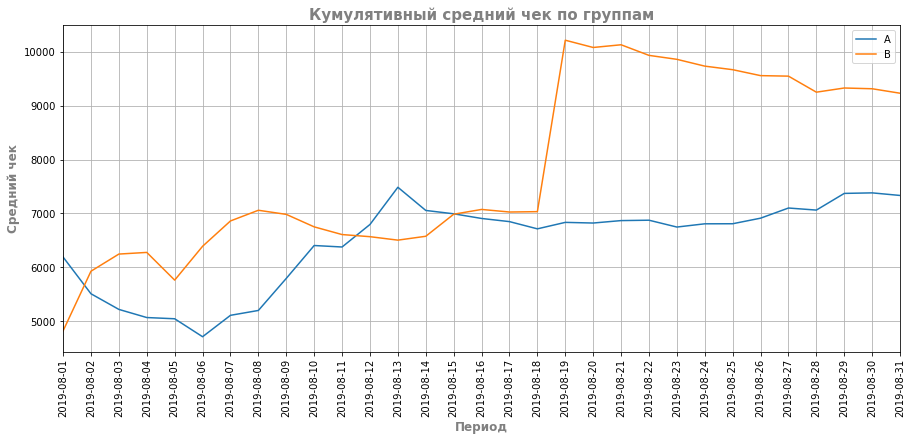

In [27]:
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("Кумулятивный средний чек по группам",fontweight='bold', color = 'grey', fontsize='15')
plt.xlabel('Период', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.ylabel('Средний чек', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.grid(visible=True)
x_ticks = np.arange('2019-08-01', '2019-09-01', 1, dtype='datetime64[D]')
plt.xticks(x_ticks,rotation = 90)
plt.xlim(cumulativeData['date'].min(),cumulativeData['date'].max());

**На этом графике ещё больше выделяется резкий всплеск в группе B вероятно из-за аномально крупных заказов. К концу периоду  у кривой  B заметен тренд на снижение  и мы обращаем внимание, что кумулятивное значение среднего чека в конце периода в группе B примерно на 25% больше, чем в группе А.**

#### Динамика относительного изменения кумулятивного среднего чека группы B к группе A.

*Соберем данные в один файл и построим график относительного различия для среднего чека:*

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

/var/folders/0s/rxrxbsvd40d7_mqw5c_cjrh00000gn/T/ipykernel_28813/1611611945.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);


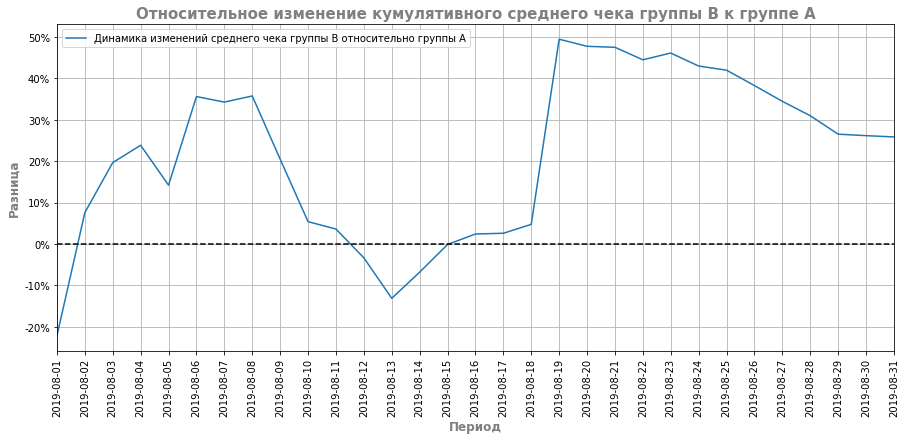

In [29]:
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label="Динамика изменений среднего чека группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A",fontweight='bold', color = 'grey', fontsize='15' )
plt.xlabel('Период', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.ylabel('Разница', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.grid(visible=True)
x_ticks = np.arange('2019-08-01', '2019-09-01', 1, dtype='datetime64[D]')
plt.xticks(x_ticks,rotation = 90)
plt.xlim(cumulativeData['date'].min(),cumulativeData['date'].max())
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);

**Убеждаемся в ранее сделанных выводах. Видим резкий скачок 13 августа и мы уже предположили, что причиной этому могут служить аномальные значения в группе A. К концу периода разница стабилизируется на уровне несколько больше 25% в пользу группы B.**

#### Динамика кумулятивного среднего количества заказов на посетителя по группам.

*Посчитаем среднее количество заказов на посетителя:*

In [30]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

*Разобъём данные на группы и построим графики:*

In [31]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

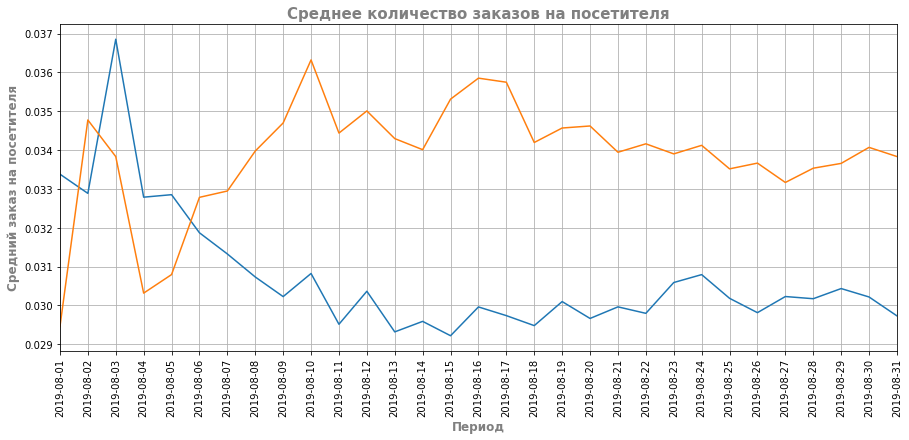

In [32]:
plt.figure(figsize=(15,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title("Среднее количество заказов на посетителя",fontweight='bold', color = 'grey', fontsize='15')
plt.xlabel('Период', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.ylabel('Средний заказ на посетителя', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.grid(visible=True)
x_ticks = np.arange('2019-08-01', '2019-09-01', 1, dtype='datetime64[D]')
plt.xticks(x_ticks,rotation = 90)
plt.xlim(cumulativeData['date'].min(),cumulativeData['date'].max());

**Видим, что в самом начале периода средние заказы  групп А и B колебались рядом, однако уже на второй неделе группа B вышла вперёд и больше не сдавала позиции. К концу периода разница закрепляется примерно на одном уровне.**

#### Динамика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

/var/folders/0s/rxrxbsvd40d7_mqw5c_cjrh00000gn/T/ipykernel_28813/170651496.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);


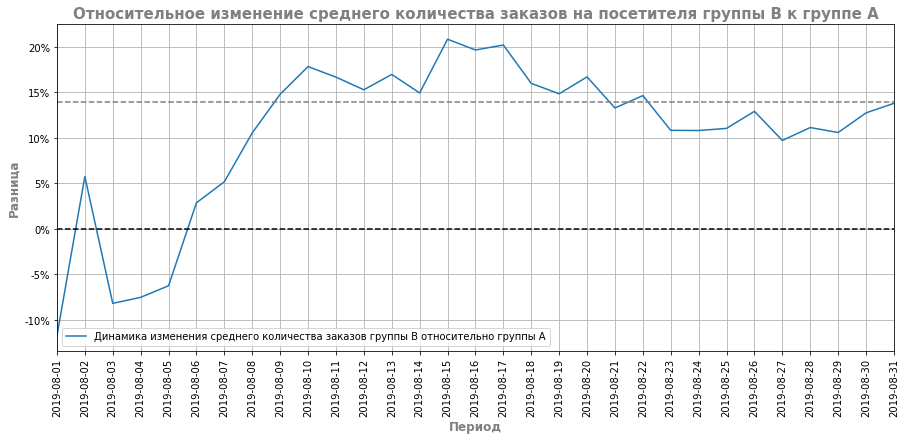

In [34]:
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Динамика изменения среднего количества заказов группы B относительно группы A")
plt.legend()
plt.title("Относительное изменение среднего количества заказов на посетителя группы В к группе А",fontweight='bold', color = 'grey', fontsize='15')
plt.xlabel('Период', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.ylabel('Разница', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.grid(visible=True)
x_ticks = np.arange('2019-08-01', '2019-09-01', 1, dtype='datetime64[D]')
plt.xticks(x_ticks,rotation = 90)
plt.xlim(cumulativeData['date'].min(),cumulativeData['date'].max())
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);

**Можем отметить, что среднее количество заказов группы B как вышло на уровень выше группы А на второй неделе, так ниже него больше не опускалось. Однако пока нельзя сказать, что оно стабилизировалось, достигнув примерно 14% к концу периода. Возможно анализ аномалий даст нам больше ответов.**

### Анализ аномальных значений.

*Найдём число заказов по пользователям:* 

In [35]:
ordersByUsers = orders.groupby('user_id', as_index=False).agg({'order_id': 'nunique'})
ordersByUsers.columns = ['user_id', 'orders']

In [36]:
ordersByUsers.sort_values(by='orders', ascending=False).head(5)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


*Построим точечную диаграмму распределения количества заказов:*

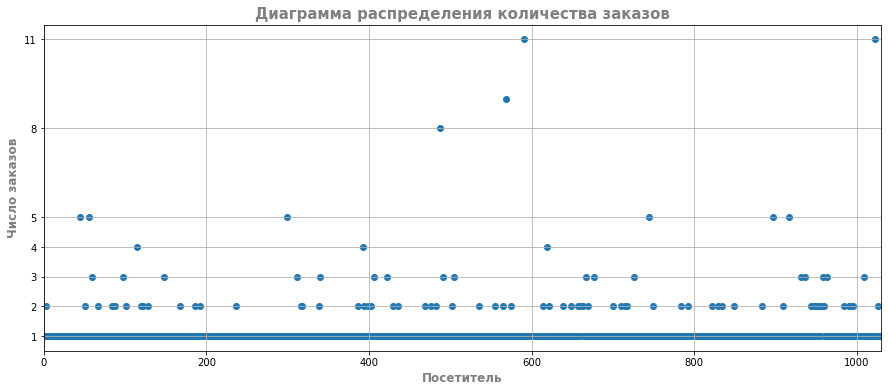

In [37]:
plt.figure(figsize=(15,6))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.yticks([1, 2, 3, 4, 5, 8, 11])
plt.title("Диаграмма распределения количества заказов",fontweight='bold', color = 'grey', fontsize='15')
plt.xlabel('Посетитель', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.ylabel('Число заказов', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.grid(visible=True)
plt.xlim(x_values.min(),x_values.max()); 

*Обращаем внимание, что больше всего одиночных заказов, но есть также много посетителей, которые размещают по 2 и 3 заказа. Есть и исключительные посетители, размещающие от 8 заказов.*

*Чтобы более точно оценить разброс выбросов посмотрим на процентили:*

In [38]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

**Итак, не более 5% посетителей размещали больше 2-х заказов, и не более 1% посетителей размещали больше 4-х заказов.Чтобы отсечь аномалии в данном случае, выберем планку в 2 заказа.** 

*Построим такую же диаграмму по сумме заказов:* 

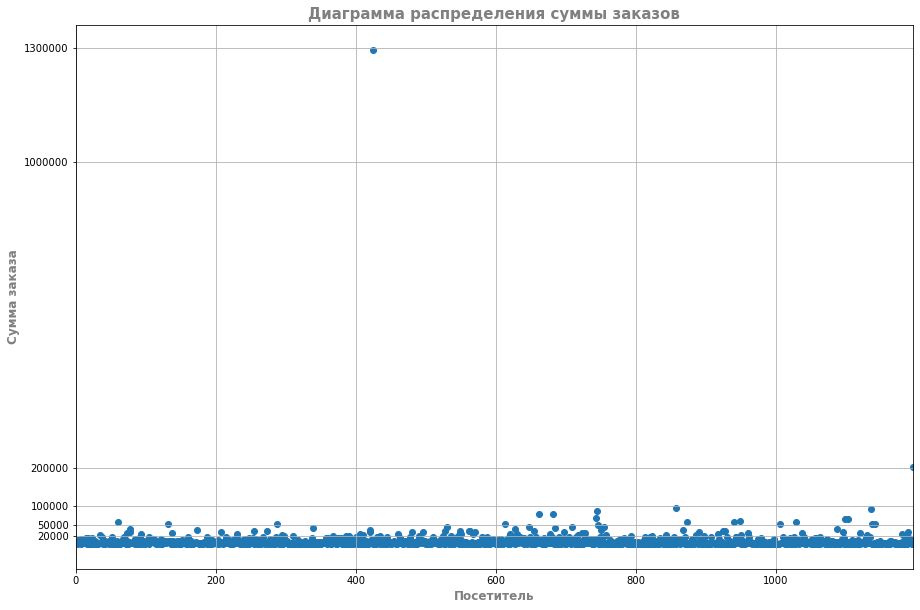

In [39]:
y = [20000, 50000, 100000, 200000, 1000000, 1300000]
plt.figure(figsize=(15,10))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.yticks(y)
plt.title("Диаграмма распределения суммы заказов",fontweight='bold', color = 'grey', fontsize='15')
plt.xlabel('Посетитель', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.ylabel('Сумма заказа', fontweight='bold', color = 'grey', fontsize='12', horizontalalignment='center')
plt.grid(visible=True)
plt.ticklabel_format(style='plain', axis='y')
plt.xlim(x_values.min(),x_values.max());

*Обращаем внимание, что большинство заказов по сумме не превышают 20000 и крупные выбросы.*

*Проверим процентили:*

In [40]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

**Итак, не более 5% посетителей размещали заказы на сумму более 28000.Чтобы отсечь аномалии в данном случае, выберем заказы стоимостью до  28000.** 

### Анализ A/B-теста.

#### Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным.

*Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве заказов между группами есть.*

*Уровень значимости alpha примем равным 0,05.*

*Подготовим данные для анализа:*

In [41]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [42]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [43]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [44]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [45]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [46]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [47]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [48]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [49]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [50]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


*Создадим необходимые переменные для проверки с помощью критерия  Манна-Уитни*

In [51]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

In [52]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

In [53]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [54]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

*Применим критерий Манна-Уитни и выведем относительный прирост среднего числа заказов группы B:*

In [55]:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост группы B:', "{0:.1f}%".format(((sampleB.mean() / sampleA.mean()) - 1)*100))

p-value = 0.017
Относительный прирост группы B: 13.8%


**Получили p-value = 0.017 меньше 0.05. Значит, мы можем отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. Также отмечаем относительный прирост группы B в 13.8%.**

#### Проверим статистическую значимость различий в среднем чеке между группами по "сырым" данным.

*Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.*

*Уровень значимости alpha примем равным 0,05.*

In [56]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост группы B:','{0:.1f}%'.format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100))

p-value = 0.729
Относительный прирост группы B: 25.9%


**P-value значительно больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако средний чек группы B почти на 26% больше среднего чека группы A. Возможно результаты искажают аномалии.**

#### Посчитаем статистическую значимость различий в среднем числе заказов на пользователя  и среднем чеке между группами по «очищенным» данным.

*Выберем посетителей, которые совершили более 2 заказов:*

In [57]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)

*А также посетителей, разместили заказа на сумму более 28000:*

In [58]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['user_id']

*Узнаем, сколько таких пользователей:*

In [59]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [60]:
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: user_id, dtype: int64

In [61]:
abnormalUsers.shape[0]

74

*Всего 74 таких пользователей. Узнаем, как их действия повляили на результаты теста. Удалим их из выборок:* 

*Сформулируем гипотезы для среднего количества заказов для  "очищенных" данных:*

*Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве заказов между группами есть. alpha = 0.05*

In [62]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [63]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

*Применим к отфильтрованным выборкам статистический критерий Манна-Уитни:*

In [64]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост группы B:', '{0:.1f}%'.format((sampleBFiltered.mean()/sampleAFiltered.mean()-1)*100))

p-value = 0.013
Относительный прирост группы B: 17.3%


**P-value уменьшился, а относительная разница увеличилась до 17,3%. Что говорит о том, что отбросив аномалии, мы только укрепляемся в отвержении нулевой гипотезы о равенстве среднего количества заказов. И можем сказать, что Группа B отличается в среднем большим количеством заказов от группы А.**

*Сформулируем гипотезы для среднего чека для  "очищенных" данных:*

*Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть. alpha = 0.05*

In [65]:
print('p-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['user_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост группы B:',
    "{0:.1f}%".format(
        (orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['user_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1)*100
    )
) 

p-value = 0.738
Относительный прирост группы B: -2.0%


**А вот со средним чеком всё не так очевидно. P-value практически не изменилось, то есть мы по прежнему не можем отвергнуть нулевую гипотезу о том, что средние чеки в группах равны. При этом разница между группами сильно сократилась (с 26 до 2%) и стала отрицательной. То есть выбросы всё-таки давали о себе знать.**

*Построим графики по очищенным данным:*

In [66]:
orders = orders.query('user_id not in @abnormalUsers')

In [67]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [68]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': 'nunique',
            'user_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [69]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [70]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [71]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


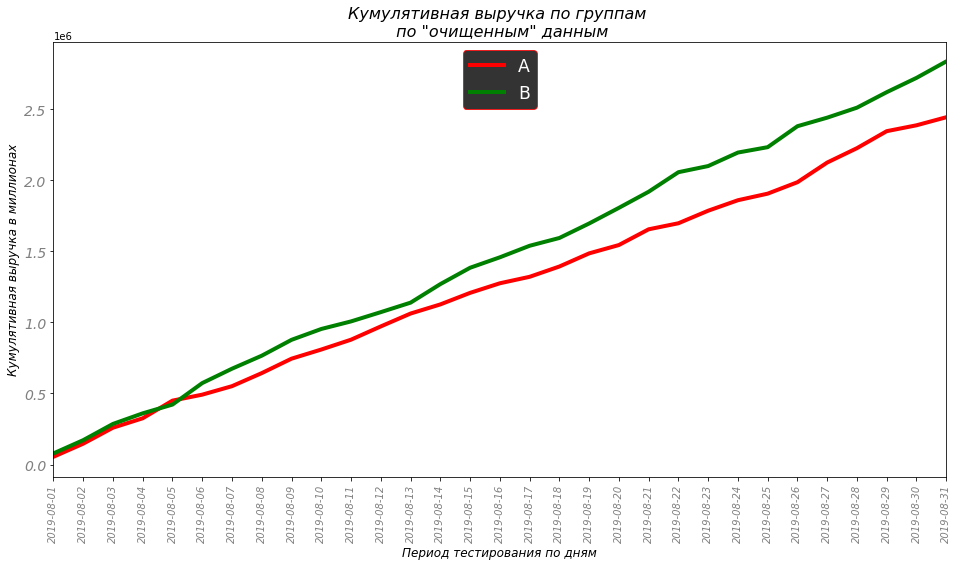

In [72]:
plt.figure(figsize=(16,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A',color='red',linewidth=4)
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B',color='green',linewidth=4)
plt.legend(loc='upper center',labelcolor='white', facecolor='black', edgecolor='red', fontsize='xx-large')
plt.title('Кумулятивная выручка по группам \n по "очищенным" данным',fontstyle='italic', color = 'black', fontsize='16')
plt.xlabel('Период тестирования по дням', fontstyle='italic', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Кумулятивная выручка в миллионах', fontstyle='italic', color = 'black', fontsize='12', horizontalalignment='center')
plt.yticks(color='grey', fontstyle='italic',fontsize='14' )
x_ticks = np.arange('2019-08-01', '2019-09-01', 1, dtype='datetime64[D]')
plt.xticks(x_ticks,rotation = 90, color='grey', fontstyle='italic', fontsize='10')
plt.xlim(cumulativeData['date'].min(),cumulativeData['date'].max());

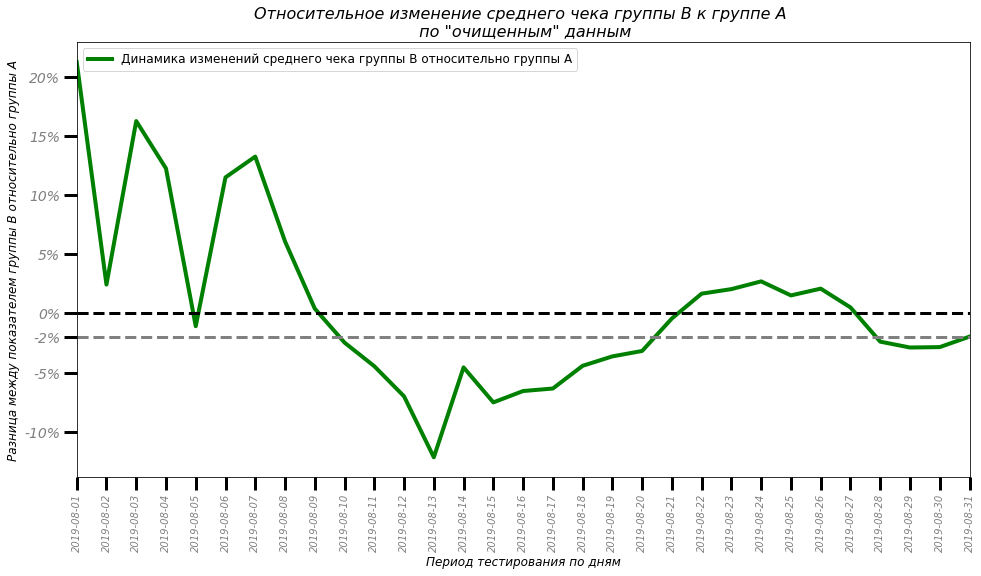

In [73]:
plt.figure(figsize=(16,8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label="Динамика изменений среднего чека группы B относительно группы A", color='green',linewidth=4)
plt.legend(loc='upper left', fontsize='12')
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=3)
plt.axhline(y=-0.02, color='grey', linestyle='dashed',linewidth=3)
plt.title('Относительное изменение среднего чека группы B к группе A \n по "очищенным" данным',fontstyle='italic', color = 'black', fontsize='16' )
plt.xlabel('Период тестирования по дням', fontstyle='italic', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Разница между показателем группы B относительно группы А', fontstyle='italic', color = 'black', fontsize='12', horizontalalignment='center')
plt.tick_params(axis='x', colors='black', direction='out', length=13, width=3)
plt.tick_params(axis='y', colors='black', direction='out', length=13, width=3)
plt.yticks([-0.1, -0.05, -0.02, 0, 0.05, 0.1, 0.15, 0.2],color='grey', fontstyle='italic',fontsize='14' )
x_ticks = np.arange('2019-08-01', '2019-09-01', 1, dtype='datetime64[D]')
plt.xticks(x_ticks, color='grey',rotation = 90, fontstyle='italic', fontsize='10')
plt.xlim(cumulativeData['date'].min(),cumulativeData['date'].max())
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);

In [74]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [75]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [76]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

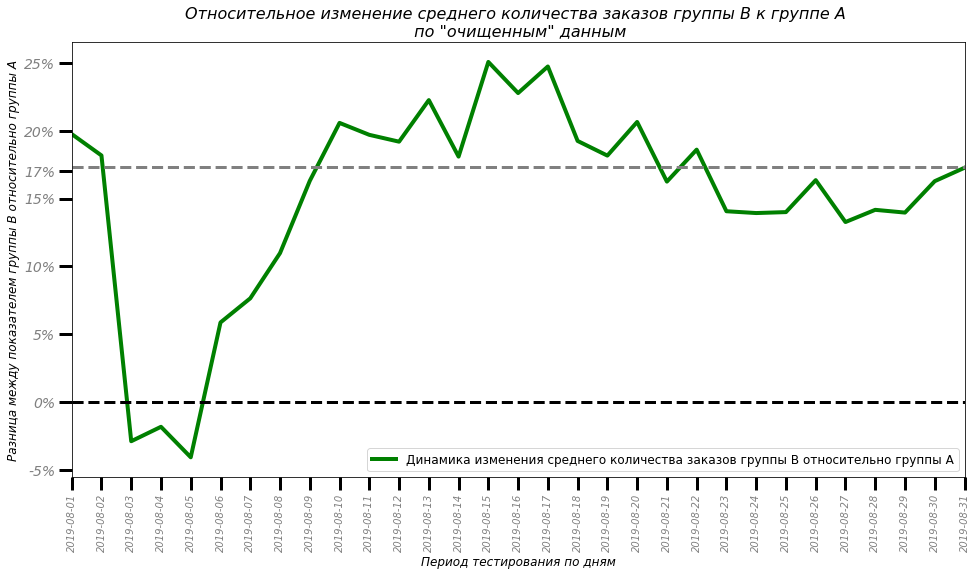

In [77]:
plt.figure(figsize=(16,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Динамика изменения среднего количества заказов группы B относительно группы A", color='green',linewidth=4)
plt.legend(loc='lower right', fontsize='12')
plt.title('Относительное изменение среднего количества заказов группы B к группе A \n по "очищенным" данным',fontstyle='italic', color = 'black', fontsize='16')
plt.xlabel('Период тестирования по дням', fontstyle='italic', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Разница между показателем группы B относительно группы А', fontstyle='italic', color = 'black', fontsize='12', horizontalalignment='center')
plt.tick_params(axis='x', colors='black', direction='out', length=13, width=3)
plt.tick_params(axis='y', colors='black', direction='out', length=13, width=3)
plt.yticks([-0.05, 0, 0.05, 0.1, 0.15, 0.17, 0.2, 0.25 ],color='grey', fontstyle='italic',fontsize='14' )
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=3)
plt.axhline(y=0.173, color='grey', linestyle='dashed',linewidth=3)
x_ticks = np.arange('2019-08-01', '2019-09-01', 1, dtype='datetime64[D]')
plt.xticks(x_ticks,color='grey', rotation = 90, fontstyle='italic', fontsize='10')
plt.xlim(cumulativeData['date'].min(),cumulativeData['date'].max())
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);

### Выводы по результатам анализа A/B-теста.

#### Получили статистическое значимое различие по количеству заказов между группами A и B. Отметили прирост среднего количества заказов в группе B относительно группы  A.

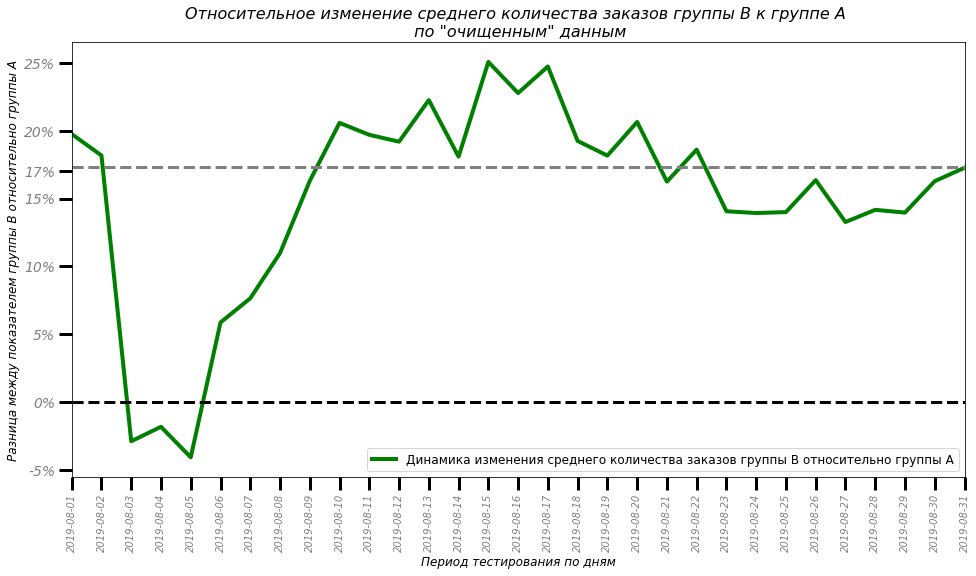

*График различия среднего количества заказов на посетителя между группами  по  очищенным данным сообщает, что очевидные различия между группами установились со второй недели, а концу периода разница установилась на уровне 17% преимущества группы B. Хотя и нельзя сказать, что разница стабилизировалась, однако в конце периода есть тенденция к росту.* 

#### Не обнаружили статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. При этом по данным после фильтрации аномалий получили убыль среднего чека на 2,3% относительно группы А.

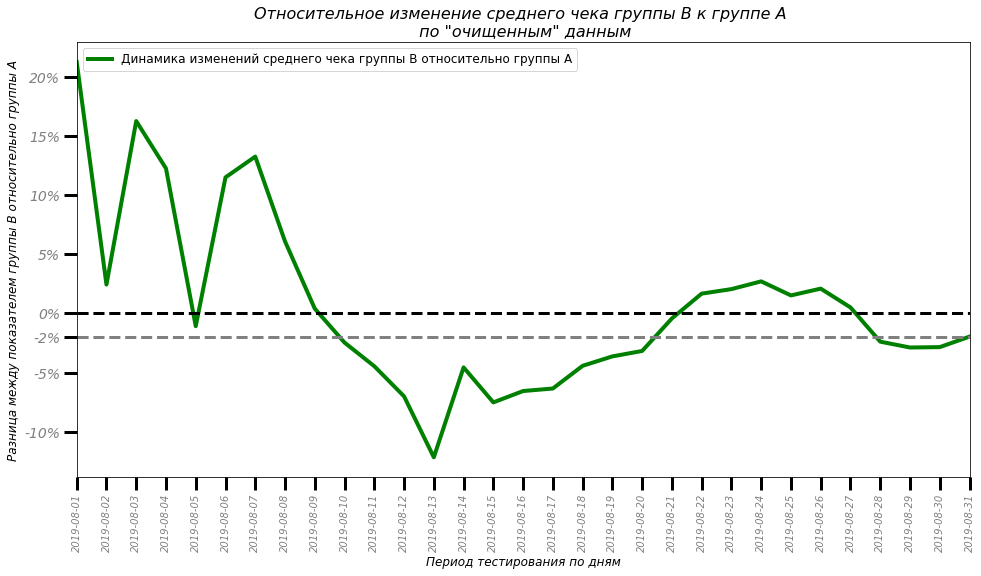

*На графике по очищенным данным можно обратить внимание, что кривая разницы средних чеков всё больше колеблится вокруг нуля. И хотя к концу периода разница отрицательная, то есть средний чек группы B меньше группы A, мы видим, что показатель группы B снова начинает расти, что лишь может подтверждать гипотезу о том, что разница средних чеков  между группами стремится к нулю.*

**Таким образом тест рекомендуется признать успешным и остановить. Мы получили статистически значимый прирост заказов в группе B при сохранении прежнего уровня среднего чека. На графике по выручке мы также можем видеть положительную тенденцию и разницу между группами  A и B:**

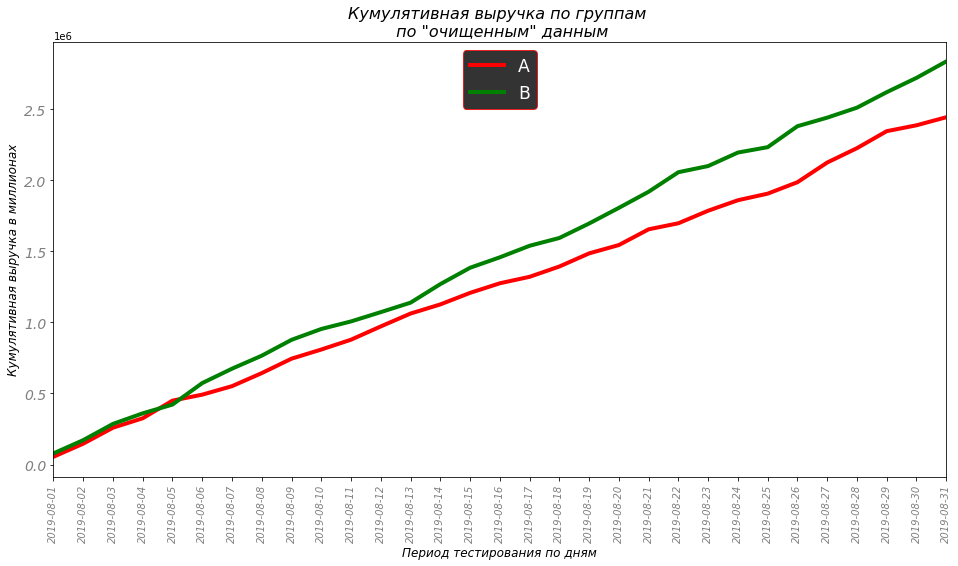